In [ ]:
#Stephen Cheney
#Recitation with homework 7

import numpy as np
from scipy.integrate import odeint
from numpy import linspace, array
import pickle
import matplotlib.pyplot as plt

def HW7ModelA(y,t, k_1, k_n1, k_2, k_n2, k_3):
    # y is a vector of the state of the system
    # this means it holds a value for
    A = y[0]
    B = y[1]
    C = y[2]
    D = y[3]
    E = y[4]
    F = y[5]

    dy=[None]*len(y) # initializing output variable

    # these equations are determined from the reaction
    dy[0] = B*C*k_n1 - A*k_1;
    dy[1] = A*k_1 - B*C*k_n1 - B*E*k_3;
    dy[2] = A*k_1 - B*C*k_n1 - C*k_2 + D*E*k_n2;
    dy[3] = C*k_2 - D*E*k_n2;
    dy[4] = C*k_2 - D*E*k_n2 - B*E*k_3;
    dy[5] = B*E*k_3 ;
    dy=array(dy)

    return dy

k_1 = 0.03; k_n1 = 0.1; k_2 = 0.3; k_n2 = 0.2; k_3 = 0.2
params = (k_1, k_n1, k_2, k_n2, k_3)

# y0 is the initial vector [E_0 S_0 C_0 P_0]
# set the substrate concentration equal to the enzyme concentration
y0 = [1., 0., 0., 0., 0., 0.]

# define the time points at which to evaluate the analytical solution
times = linspace(0.,400.,401)
# now find the numerical solution using "odeint" for the same initial vector
y = odeint(HW7ModelA, y0, times, params)
# add some experimental noise to the dependent variable values
# use normal (Gaussian) noise with a s.d. of 0.025
fracnoise = 0.025

# ode will remain the same, randnoise will change vars.
# For loop 5 times with ynoisy changing each time while still keeping just one file
# being written to

arrxfit = [] #xfit params array
arrssr = [] #ssr array

for j in range(5): # for 5 rouds of generated data
  randnoise = np.random.randn(y.shape[0],y.shape[1])*fracnoise
  ynoisy = y + np.multiply(randnoise,y)

  # save the simulated results into a file
  f = open('exercise7data.pckl','wb')
  syndata=np.zeros((len(times),len(y0)+1))
  syndata[:,0] = times
  syndata[:,1:len(y0)+1] = ynoisy
  pickle.dump(syndata, f)
  f.close()


############


  #define a function to give values of dependent variables from the model parameters
  #this will also save each set of parameters that it is called with so we can
  #visualize the fitting process
  def odesol(XDATA,p1,p2,p3,p4,p5):

      params=array([p1,p2,p3,p4,p5])

      # use a file to pass the initial values of the dependent variables
      f = open('initialconc.pckl','rb')
      Q0 = pickle.load(f)
      f.close()

      F=odeint(HW7ModelA,Q0,XDATA,tuple(params))

      return F.ravel() # to make the output 1D , curve_fit function requirement

  # now do the fitting

  import scipy.optimize as optimization

  # get the data that we need to estimate parameters for
  f = open('exercise7data.pckl','rb')
  data = pickle.load(f)
  f.close()

  # separate it into independent variable and dependent variables
  XDATA=data[:,0]
  YDATA=data[:,1:]
  # store the initial concentrations because odesol has no way to get them
  Q0=YDATA[0,:]
  f = open('initialconc.pckl', 'wb')
  pickle.dump(Q0, f)
  f.close()

  # set initial guesses
  initialparams=array([0.2, 0.1, 0.1, 0.1, 0.1])

  # do the least square curve fitting to estimate the rate constants
  Xfit, pcov = optimization.curve_fit(odesol, XDATA.ravel(), YDATA.ravel(), initialparams.ravel())
  #print(Xfit)
  arrxfit.append(Xfit) # add the constants to the array

  # evalute the ode model with the calculated rate constants
  F=odeint(HW7ModelA,Q0,XDATA,tuple(Xfit))

  # initialize squared deviation array
  SqDev=[None]*len(Q0)

  # plot the original data and the fit
  plt.close("all")
  for i in range(0,len(Q0)): #comment out plots
  #    plt.figure()
  #    plt.plot(XDATA,YDATA[:,i],label='Original data')
  #    plt.plot(XDATA,F[:,i],label='Model')
  #    plt.xlabel('time');
  #    plt.ylabel('Concentration of species '+str(i));
  #    plt.legend()
  #    #plt.savefig('exercise7fig'+str(i)+'.png', bbox_inches='tight')
  #    plt.show(block=False)
      SqDev[i]=sum((YDATA[:,i]-F[:,i])**2);

  #print(sum(SqDev))
  arrssr.append(sum(SqDev)) # add the ssr to the array

#### Question 1 ####
# print the 5 rounds:
print("Params:",arrxfit)
print("SSRs:",arrssr)

#### Question 2 ####
# I do not get the same value for the SSR each round. This is due to the random
# noise that is generated (being random) each round, so the sum of the squared
# standard deviations is going to change each time.

# Param 0
p0arr = []
for q in range(5):
  p0arr.append(arrxfit[q][0])
p0mean = np.mean(p0arr)
p0std = np.std(p0arr)
print("P0 Mean:",p0mean,"| P0 STD:", p0std)
# Param 1
p1arr = []
for q in range(5):
  p1arr.append(arrxfit[q][1])
p1mean = np.mean(p1arr)
p1std = np.std(p1arr)
print("P1 Mean:",p1mean,"| P1 STD:", p1std)
# Param 2
p2arr = []
for q in range(5):
  p2arr.append(arrxfit[q][2])
p2mean = np.mean(p2arr)
p2std = np.std(p2arr)
print("P2 Mean:",p2mean,"| P2 STD:", p2std)
# Param 3
p3arr = []
for q in range(5):
  p3arr.append(arrxfit[q][3])
p3mean = np.mean(p3arr)
p3std = np.std(p3arr)
print("P3 Mean:",p3mean,"| P3 STD:", p3std)
# Param 4
p4arr = []
for q in range(5):
  p4arr.append(arrxfit[q][4])
p4mean = np.mean(p4arr)
p4std = np.std(p4arr)
print("P4 Mean:",p4mean,"| P4 STD:", p4std)

#### Question 3 ####
# Parameter 3 (0 though 4) varies the most due to having the greatest standard
# deviation. This is constant through many trials of 5 rounds of compiled data

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Params: [array([0.02533106, 0.00067574, 0.34980533, 0.21272757, 0.2060209 ]), array([0.03380982, 0.16663925, 0.39065658, 0.36517525, 0.19024595]), array([0.02900165, 0.0783258 , 0.30030513, 0.18246602, 0.20189009]), array([0.03258404, 0.1478684 , 0.35474607, 0.30138313, 0.19240628]), array([0.03102833, 0.12059668, 0.32146225, 0.23840813, 0.19932832])]
SSRs: [0.6002652832639819, 1.080963494295938, 0.4185113852723949, 0.7430143386142262, 0.42970145093203055]
P0 Mean: 0.030350979952715136 | P0 STD: 0.0029809115834198395
P1 Mean: 0.10282117478825933 | P1 STD: 0.05907906688602663
P2 Mean: 0.3433950718515189 | P2 STD: 0.030794085578227062
P3 Mean: 0.26003202081523663 | P3 STD: 0.06555425126774639
P4 Mean: 0.19797830695582055 | P4 STD: 0.0058761352033638295


In [ ]:
#### Question 4 ####

try:
    import google.colab
except ImportError:
    pass

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%!
cd /content/drive/MyDrive/CMPBIO250
cd HW7
ls

['homework7data.pckl']

Model A params: [0.09540767 0.17983599 0.5408114  1.03017772 0.07489748]
Model A SSR: 0.2748260283737164


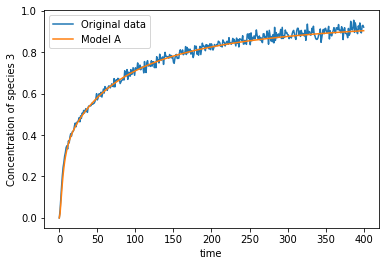

Model B params: [0.16436021 2.4824265  1.08821862 1.12398298 0.0329954 ]
Model B SSR: 136.26481276881808


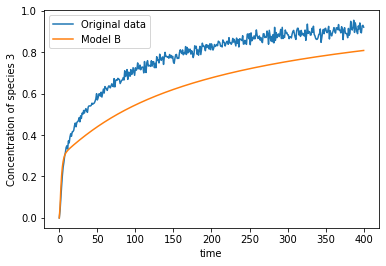

In [ ]:
def HW7ModelB(y,t, k_1, k_n1, k_2, k_n2, k_3):
    # y is a vector of the state of the system
    # this means it holds a value for
    A = y[0]
    B = y[1]
    C = y[2]
    D = y[3]
    E = y[4]
    F = y[5]

    dy=[None]*len(y) # initializing output variable

    # these equations are determined from the reaction
    dy[0] = B*C*k_n1 - A*k_1;
    dy[1] = A*k_1 - B*C*k_n1;
    dy[2] = A*k_1 - B*C*k_n1 + D*E*k_n2 - C*k_2;
    dy[3] = C*k_2 - D*E*k_n2;
    dy[4] = C*k_2 - D*E*k_n2 - E*k_3;
    dy[5] = E*k_3 ;
    dy=array(dy)

    return dy

####### Calculate Model A ########

def odesol(XDATA,p1,p2,p3,p4,p5):

  params=array([p1,p2,p3,p4,p5])

  # use a file to pass the initial values of the dependent variables
  f = open('initialconc.pckl','rb')
  Q0 = pickle.load(f)
  f.close()

  F=odeint(HW7ModelA,Q0,XDATA,tuple(params))

  return F.ravel() # to make the output 1D , curve_fit function requirement

# now do the fitting

# get the data that we need to estimate parameters for
f = open('/content/drive/MyDrive/CMPBIO250/HW7/homework7data.pckl','rb') # change file to homework file
data = pickle.load(f)
f.close()

# separate it into independent variable and dependent variables
XDATA=data[:,0]
YDATA=data[:,1:]
# store the initial concentrations because odesol has no way to get them
Q0=YDATA[0,:]
f = open('initialconc.pckl', 'wb')
pickle.dump(Q0, f)
f.close()

# set initial guesses
initialparams=array([0.2, 0.1, 0.1, 0.1, 0.1])

# do the least square curve fitting to estimate the rate constants
Xfit, pcov = optimization.curve_fit(odesol, XDATA.ravel(), YDATA.ravel(), initialparams.ravel())
print("Model A params:",Xfit)


# evalute the ode model with the calculated rate constants
F=odeint(HW7ModelA,Q0,XDATA,tuple(Xfit))

# initialize squared deviation array
SqDev=[None]*len(Q0)

# plot the original data and the fit
plt.close("all")
for i in range(0,len(Q0)): # Delete the plots for each species
    SqDev[i]=sum((YDATA[:,i]-F[:,i])**2);

print("Model A SSR:",sum(SqDev)) # The SSR

# Plot Species 3
plt.figure()
plt.plot(XDATA,YDATA[:,3],label='Original data')
plt.plot(XDATA,F[:,3],label='Model A')
plt.xlabel('time');
plt.ylabel('Concentration of species '+str(3));
plt.legend()
#plt.savefig('exercise7fig'+str(i)+'.png', bbox_inches='tight')
plt.show(block=False)

####### Calculate Model B ########

def odesol2(XDATA,p1,p2,p3,p4,p5):

  params=array([p1,p2,p3,p4,p5])

  # use a file to pass the initial values of the dependent variables
  f = open('initialconc.pckl','rb')
  Q0 = pickle.load(f)
  f.close()

  F=odeint(HW7ModelB,Q0,XDATA,tuple(params)) # change the ode solver to use Model B

  return F.ravel() # to make the output 1D , curve_fit function requirement

# now do the fitting

# get the data that we need to estimate parameters for
f = open('/content/drive/MyDrive/CMPBIO250/HW7/homework7data.pckl','rb') # change file to homework file
data = pickle.load(f)
f.close()

# separate it into independent variable and dependent variables
XDATA=data[:,0]
YDATA=data[:,1:]
# store the initial concentrations because odesol has no way to get them
Q0=YDATA[0,:]
f = open('initialconc.pckl', 'wb')
pickle.dump(Q0, f)
f.close()

# set initial guesses
initialparams=array([0.2, 0.1, 0.1, 0.1, 0.1])

# do the least square curve fitting to estimate the rate constants
# use odesol2 to compute Model B for the same data
Xfit, pcov = optimization.curve_fit(odesol2, XDATA.ravel(), YDATA.ravel(), initialparams.ravel())
print("Model B params:",Xfit)


# evalute the ode model with the calculated rate constants
F=odeint(HW7ModelB,Q0,XDATA,tuple(Xfit))

# initialize squared deviation array
SqDev=[None]*len(Q0)

# plot the original data and the fit
plt.close("all")
for i in range(0,len(Q0)): # delete the plots for each species
    SqDev[i]=sum((YDATA[:,i]-F[:,i])**2);

print("Model B SSR:",sum(SqDev)) # the SSR

# Plot Species 3
plt.figure()
plt.plot(XDATA,YDATA[:,3],label='Original data')
plt.plot(XDATA,F[:,3],label='Model B')
plt.xlabel('time');
plt.ylabel('Concentration of species '+str(3));
plt.legend()
#plt.savefig('exercise7fig'+str(i)+'.png', bbox_inches='tight')
plt.show(block=False)

#Question 6
After looking specifically at the models of Species 3, it is clear that Model A is the better fit. The model's SSR is drastically lower than Model b. Also, we can see in the graphs that the model line in Model A follows more closely to the original data, demonstrating the SSR.